## Работа с выбросами

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Загрузка данных

In [45]:
df = pd.read_csv("train.csv")

In [46]:
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [48]:
df.drop(['Healthcare_1','Id'],axis=1,inplace=True)

In [49]:
df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,0,0,B,305018.871089
1,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1,0,B,177734.553407
2,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,3,1,B,282078.720850
3,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,0,1,B,168106.007630
4,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,1,9,B,119367.455796
9996,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,0,0,A,199715.148807
9997,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,1,5,B,165953.912580
9998,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,3,5,B,171842.411855


In [50]:
df['LifeSquare'] = df['LifeSquare'].fillna(df['Square']-df['KitchenSquare']-6)

In [51]:
df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,27,3.0,115.027311,99.027311,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,0,0,B,305018.871089
1,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1,0,B,177734.553407
2,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,3,1,B,282078.720850
3,1,1.0,40.409907,33.409907,1.0,10,22.0,1977,0.007122,B,B,1,264,0,0,1,B,168106.007630
4,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,1,9,B,119367.455796
9996,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,0,0,A,199715.148807
9997,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,1,5,B,165953.912580
9998,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,3,5,B,171842.411855


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Helthcare_2    10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
 16  Shops_2        10000 non-null  object 
 17  Price          10000 non-null  float64
dtypes: floa

In [53]:
from sklearn.preprocessing import LabelEncoder
col = ['Ecology_2', 'Ecology_3','Shops_2']
labeler = LabelEncoder()
df.loc[:,col] = df.loc[:,col].apply(labeler.fit_transform)
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,27,3.0,115.027311,99.027311,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089
1,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407
2,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850
3,1,1.0,40.409907,33.409907,1.0,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630
4,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  int32  
 10  Ecology_3      10000 non-null  int32  
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Helthcare_2    10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
 16  Shops_2        10000 non-null  int32  
 17  Price          10000 non-null  float64
dtypes: floa

## Обнаружение и обработка выбросов

Price

<AxesSubplot:>

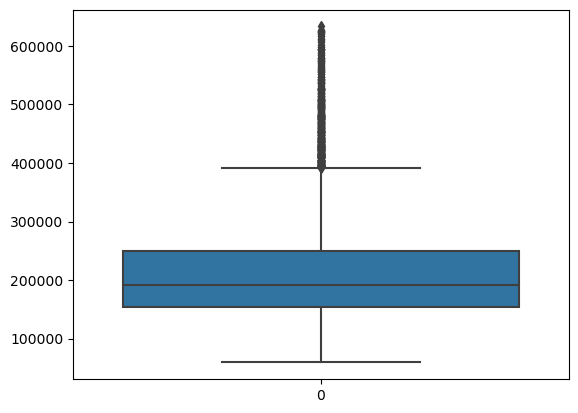

In [29]:
sns.boxplot(data=df['Price'])

In [34]:
def outliers_iqr(x):
    quartile_1, quartile_3 = np.percentile(x, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))[0], x[(x <= upper_bound) & (x >= lower_bound)].min(), x[(x <= upper_bound) & (x >= lower_bound)].max()

In [35]:
price_outliers_index, min_border, max_border = outliers_iqr(df['Price'])

In [36]:
len(price_outliers_index)

583

In [37]:
min_border, max_border

(59174.77802758122, 391982.6481840012)

In [38]:
df.loc[price_outliers_index, 'Price']=np.nan

z-score

In [55]:
def outliers_z_score(x, threshold=3):
    mean = np.mean(x)
    std = np.std(x)
    z_scores = [(element - mean) / std for element in x]
    return np.where(np.abs(z_scores) > threshold)[0]

In [56]:
price_outliers_index = outliers_z_score(df['Price'])

In [57]:
len(price_outliers_index)

175

In [58]:
from scipy.stats import norm

def estimate_gaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def get_gaussian(mu, sigma):
    distribution = norm(mu, sigma)
    return distribution

def get_probs(distribution, dataset):
    return distribution.pdf(dataset)

In [59]:
mu, sigma = estimate_gaussian(df['Price'])
distribution = get_gaussian(mu, sigma)
probabilities = get_probs(distribution, df['Price'])

In [60]:
probabilities

array([4.62527672e-11, 4.62527672e-11, 4.62527672e-11, ...,
       4.62527672e-11, 4.62527672e-11, 4.62527672e-11])

In [61]:
probabilities.max()

4.625276723644675e-11

In [62]:
price_outliers_index = np.where(probabilities<4.62527672e-11)[0]

In [63]:
len(price_outliers_index)

61

Rooms

In [65]:
df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [67]:
df.loc[df['Rooms'] == 0, 'Rooms'] = 1
df.loc[(df['Rooms'] > 6), 'Rooms'] = df['Rooms'].median()

In [68]:
df['Rooms'].value_counts()

2.0    3883
1.0    3713
3.0    2235
4.0     150
5.0      18
6.0       1
Name: Rooms, dtype: int64

In [70]:
rooms_outlier_index = df.loc[(df['Rooms'] == 0)|(df['Rooms'] >= 6), 'Rooms'].index
df['Rooms_outlier'] = 0
df.loc[rooms_outlier_index, 'Rooms_outlier'] = 1

KitchenSquare

In [71]:
df['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
30.0         2
43.0         2
41.0         2
112.0        2
25.0         2
51.0         2
37.0         2
58.0         2
32.0         2
21.0         1
73.0         1
75.0         1
36.0         1
27.0         1
63.0         1
1970.0       1
54.0         1
53.0         1
60.0         1
26.0         1
66.0         1
39.0         1
29.0         1
78.0         1
31.0         1
84.0         1
48.0         1
96.0         1
42.0         1
40.0         1
23.0         1
72.0         1
35.0         1
62.0         1
123.0        1
2014.0       1
Name: KitchenSquare, dtype: int64

In [181]:
df = pd.read_csv("cars_sampled.csv")

In [182]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [184]:
df=df[['price','yearOfRegistration','powerPS','kilometer','monthOfRegistration','postalCode']]

In [185]:
df

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
0,4450,2003,150,150000,3,20257
1,13299,2005,163,150000,6,88045
2,3200,2003,101,150000,11,27449
3,4500,2006,86,60000,12,34537
4,18750,2008,185,150000,11,55270
...,...,...,...,...,...,...
49996,0,2005,0,150000,0,29690
49997,19999,1990,0,5000,0,50181
49998,0,2004,0,150000,1,86956
49999,100,2000,0,150000,8,65232


In [187]:
df['price'].value_counts()

0         1451
500        742
1500       705
1000       647
2500       594
          ... 
103990       1
370000       1
2151         1
225000       1
175000       1
Name: price, Length: 2393, dtype: int64

In [188]:

rooms_outlier_index = df.loc[(df['price'] == 0), 'price'].index
df['price_outlier'] = 0
df.loc[rooms_outlier_index, 'price_outlier'] = 1
df.loc[(df['price'] == 0), 'price'] = df['price'].median()

In [189]:
price_outliers_index, min_border, max_border = outliers_iqr(df['price'])

In [190]:
min_border, max_border

(1, 16000)

In [191]:
len(price_outliers_index)

3787

In [192]:
df.loc[price_outliers_index, 'price']=np.nan

In [193]:
df['price'].value_counts()

2950.0     1626
500.0       742
1500.0      705
1000.0      647
2500.0      594
           ... 
3270.0        1
285.0         1
6895.0        1
10099.0       1
2944.0        1
Name: price, Length: 1540, dtype: int64

In [195]:
df['yearOfRegistration'].value_counts()

2000    3315
2005    3131
1999    3055
2001    2804
2003    2756
        ... 
1928       1
2900       1
8500       1
1940       1
1934       1
Name: yearOfRegistration, Length: 97, dtype: int64

In [ ]:

rooms_outlier_index = df.loc[(df['yearOfRegistration'] > 2023)|(df['yearOfRegistration'] <1920), 'yearOfRegistration'].index
df['year_outlier'] = 0
df.loc[rooms_outlier_index, 'year_outlier'] = 1

In [196]:
df.loc[(df['yearOfRegistration'] > 2023), 'yearOfRegistration'] = df['yearOfRegistration'].median()
df.loc[(df['yearOfRegistration'] < 1920), 'yearOfRegistration'] = df['yearOfRegistration'].median()

In [197]:
df['yearOfRegistration'].value_counts()

2000    3315
2005    3131
1999    3055
2001    2804
2003    2804
        ... 
1934       1
1929       1
1933       1
1941       1
1938       1
Name: yearOfRegistration, Length: 81, dtype: int64

In [199]:
df['powerPS'].value_counts()

0      5605
75     3264
60     2167
150    2057
140    1795
       ... 
268       1
416       1
382       1
401       1
386       1
Name: powerPS, Length: 460, dtype: int64

In [201]:
powerPS_outliers_index = outliers_z_score(df['powerPS'])

In [202]:
len(powerPS_outliers_index)

47

In [203]:
df.loc[powerPS_outliers_index, 'powerPS']=np.nan

<AxesSubplot:>

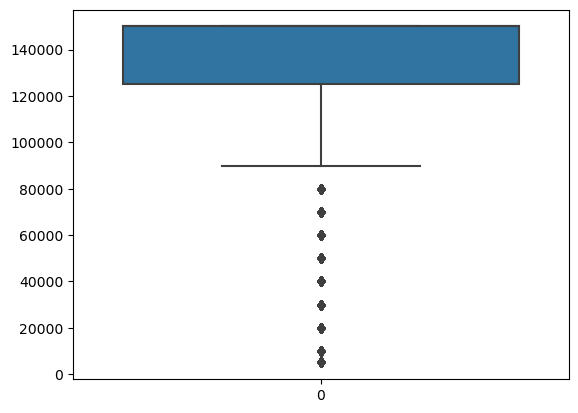

In [204]:
sns.boxplot(data=df['kilometer'])

In [205]:
df['kilometer'].value_counts()

150000    32442
125000     5124
100000     2130
90000      1634
80000      1509
70000      1284
60000      1194
50000      1023
5000       1002
40000       856
30000       787
20000       754
10000       262
Name: kilometer, dtype: int64

In [206]:
mu, sigma = estimate_gaussian(df['kilometer'])
distribution = get_gaussian(mu, sigma)
probabilities = get_probs(distribution, df['kilometer'])

In [207]:
probabilities

array([2.46799836e-10, 2.46799836e-10, 2.46799836e-10, ...,
       2.46799836e-10, 2.46799836e-10, 2.46799836e-10])

In [208]:
kil_outliers_index = np.where(probabilities<2.46799836e-10)[0]

In [209]:
len(kil_outliers_index)

4684

In [210]:
df['monthOfRegistration'].value_counts()

0     5043
3     4755
6     4449
4     4153
5     4109
7     3897
10    3666
9     3453
11    3436
12    3403
1     3286
8     3240
2     3111
Name: monthOfRegistration, dtype: int64

In [ ]:

rooms_outlier_index = df.loc[(df['monthOfRegistration'] ==0), 'monthOfRegistration'].index
df['month_outlier'] = 0
df.loc[rooms_outlier_index, 'month_outlier'] = 1

In [211]:
df.loc[(df['monthOfRegistration'] ==0), 'monthOfRegistration'] = df['monthOfRegistration'].median()

In [212]:
df['postalCode'].value_counts()

10115    116
65428     70
50354     48
53757     47
44145     47
        ... 
67715      1
72229      1
74638      1
76764      1
17214      1
Name: postalCode, Length: 7018, dtype: int64

<AxesSubplot:>

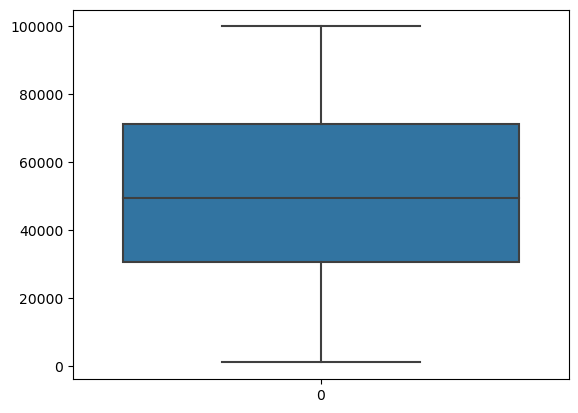

In [213]:
sns.boxplot(data=df['postalCode'])

In [214]:
pc_outliers_index, min_border, max_border = outliers_iqr(df['postalCode'])

In [215]:
min_border, max_border

(1067, 99998)

In [216]:
df.loc[pc_outliers_index, 'postalCode']=np.nan

In [217]:
df.dropna()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode,price_outlier
0,4450.0,2003,150.0,150000,3,20257.0,0
1,13299.0,2005,163.0,150000,6,88045.0,0
2,3200.0,2003,101.0,150000,11,27449.0,0
3,4500.0,2006,86.0,60000,12,34537.0,0
5,988.0,1995,90.0,150000,2,26826.0,0
...,...,...,...,...,...,...,...
49995,2290.0,2001,101.0,150000,3,27305.0,0
49996,2950.0,2005,105.0,150000,6,29690.0,1
49998,2950.0,2004,105.0,150000,1,86956.0,1
49999,100.0,2000,105.0,150000,8,65232.0,0
